In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/country-mapping-iso-continent-region")

print("Path to dataset files:", path)

100%|██████████| 4.96k/4.96k [00:00<00:00, 7.46MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/country-mapping-iso-continent-region/versions/1


In [87]:
!pip uninstall Prophet -y
!pip install prophet

Found existing installation: prophet 1.1.6
Uninstalling prophet-1.1.6:
  Successfully uninstalled prophet-1.1.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 66.6 MB/s eta 0:00:00


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Changed import statement to use 'prophet' instead of 'fbprophet'
from prophet import Prophet
plt.style.use("ggplot")
from sklearn.metrics import r2_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df0 = pd.read_csv('/content/drive/My Drive/Data Science Projects/ML_Projects/covid19/data/CONVENIENT_global_confirmed_cases.csv')
df1 = pd.read_csv('/content/drive/My Drive/Data Science Projects/ML_Projects/covid19/data/CONVENIENT_global_deaths.csv')

In [11]:
df1.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Preparation**

In [14]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []

for country in world["Country"]:
    total_cases = pd.to_numeric(df0[country], errors='coerce').sum()
    cases.append(total_cases)

world["Cases"] = cases

In [21]:
country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent=pd.read_csv('/content/drive/My Drive/Data Science Projects/ML_Projects/covid19/data/continents2.csv')
continent["name"]=continent["name"].str.upper()

In [23]:
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [24]:
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES"
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

In [78]:

fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [28]:
df0.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
date = df0.iloc[1:,:1]
cases = df0.iloc[2:,2:].sum()
cases

,0
Albania,334457.0
Algeria,271496.0
Andorra,47890.0
Angola,105288.0
Antarctica,11.0
...,...
West Bank and Gaza,703228.0
Winter Olympics 2022,535.0
Yemen,11945.0
Zambia,343135.0


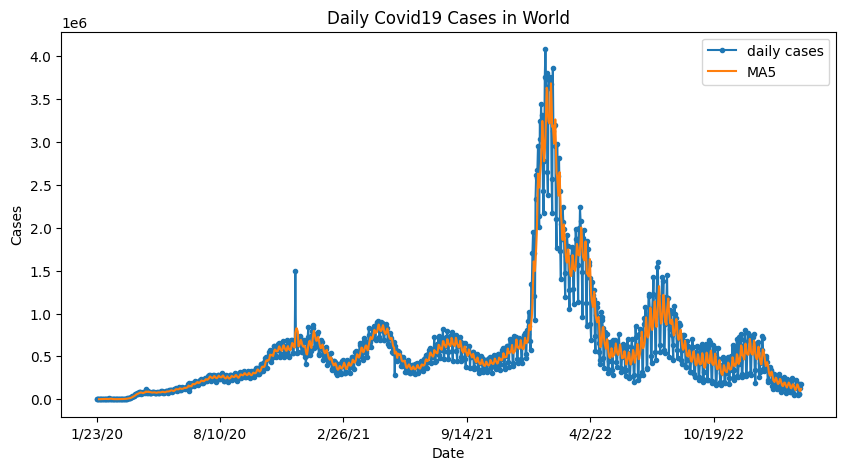

In [79]:
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

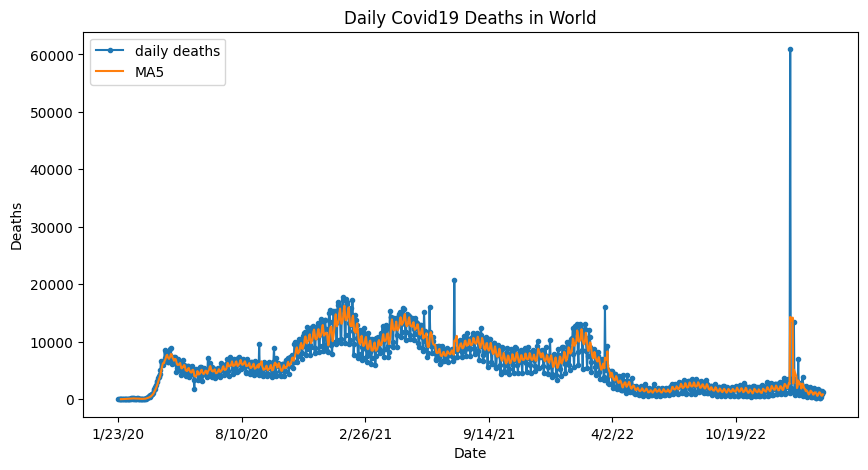

In [80]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

<ipython-input-91-836ccd968556>:22: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7l9juba/4wu3uqbd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7l9juba/laget20w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49299', 'data', 'file=/tmp/tmpf7l9juba/4wu3uqbd.json', 'init=/tmp/tmpf7l9juba/laget20w.json', 'output', 'file=/tmp/tmpf7l9juba/prophet_modelqw5s6kzv/prophet_model-20241106075225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


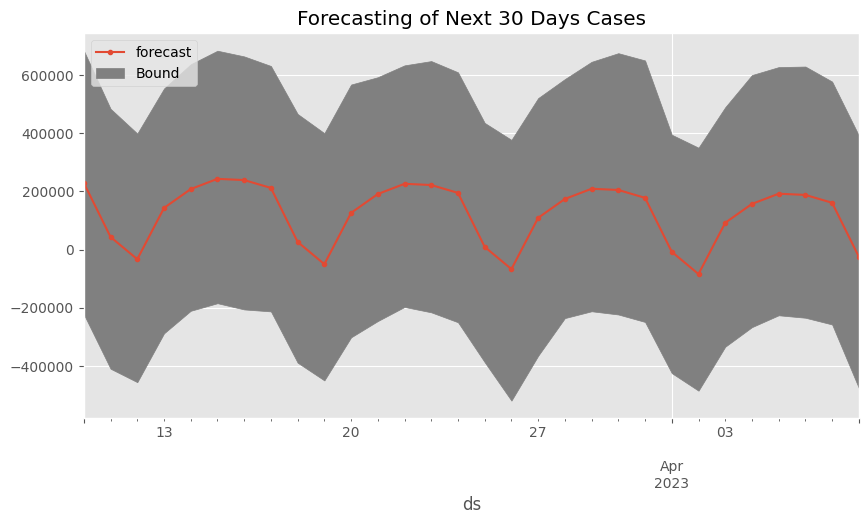

In [91]:
class Fbprophet(object):
    def fit(self,data):

        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)

    def forecast(self,periods,freq):

        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)

    def plot(self,xlabel="Years",ylabel="Values"):

        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))

    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()